In [3]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
# Chúng ta cũng cần thêm thư viện scipy.spatial.distance để tính khoảng cách giữa các cặp điểm trong hai tập hợp một cách hiệu quả.

np.random.seed(11)

In [2]:
# Tiếp theo, ta tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại các điểm có tọa độ (2, 2), (8, 3) và (3, 6),
# ma trận hiệp phương sai giống nhau và là ma trận đơn vị.
# (Chú ý rằng mỗi điểm dữ liệu là một hàng của ma trận dữ liệu.)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]] # ma trận hiệp phương sai
N = 500

# X0, X1, X2 là ma trận dữ liệu
X0 = np.random.multivariate_normal(means[0], cov, N) # (500, 2)
X1 = np.random.multivariate_normal(means[1], cov, N) # (500, 2)
X2 = np.random.multivariate_normal(means[2], cov, N) # (500, 2)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [16]:
print(X)

[[ 3.74945474  1.713927  ]
 [ 1.51543487 -0.65331856]
 [ 1.99171537  1.68036864]
 ...
 [ 2.56402984  5.10138061]
 [ 3.62998852  6.60564711]
 [ 2.31894139  6.84856953]]


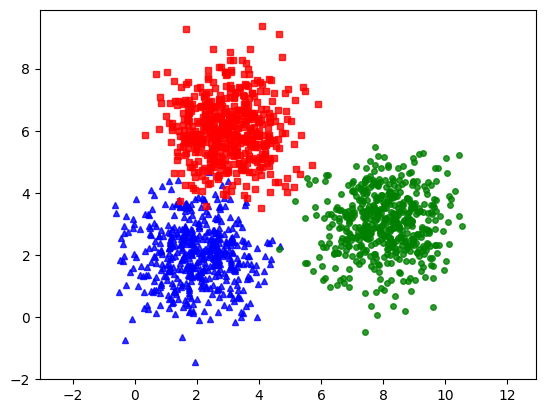

In [12]:
# Hiển thị dữ liệu lên trên đồ thị
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X, original_label)

In [13]:
# Khởi tạo các centers ban đầu
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

# Gán nhãn mới cho các điểm khi biết các centers
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers) # tính khoảng cách của xi với mi
    # return index of the closest center
    return np.argmin(D, axis = 1)

# Cập nhật các centers mới trên dữ liệu vừa được gán nhãn
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

# Kiểm tra điều kiện dừng của thuật toán
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) ==
        set([tuple(a) for a in new_centers]))

In [14]:
# main part of K-means Clustering
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

[array([0, 2, 2, ..., 1, 1, 1]), array([2, 2, 2, ..., 1, 1, 1]), array([2, 2, 2, ..., 1, 1, 1]), array([2, 2, 2, ..., 1, 1, 1]), array([2, 2, 2, ..., 1, 1, 1]), array([2, 2, 2, ..., 1, 1, 1])]
Centers found by our algorithm:
[[8.0410628  3.02094748]
 [2.9898012  6.03271696]
 [1.9780868  2.0065323 ]]


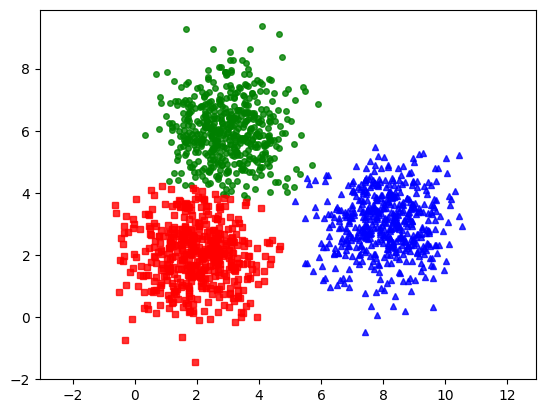

In [18]:
(centers, labels, it) = kmeans(X, K)
print(labels)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])